In [2]:
# Importing the libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importing Dataset

In [4]:
data = pd.read_csv('ObesitydataSet.csv')

## Preprocessing dataset features

In [5]:
data_1 = data[['Gender', 'Age', 'family_history_with_overweight',
          'FAVC', 'FCVC', 'NCP','SMOKE', 'SCC']]
data['family_history_with_overweight'] = data_1['family_history_with_overweight'].map({'yes':1,'no':0})
data['Gender'] = data_1['Gender'].map({'Male':1,'Female':0})
data['FAVC'] = data_1['FAVC'].map({'yes':1,'no':0})
data['SMOKE'] = data_1['SMOKE'].map({'yes':1,'no':0})
data['SCC'] = data_1['SCC'].map({'yes':1,'no':0})

## Converting Categorical Features into Numerical

In [6]:
ord_encoders = {}
ord_vars = ('CAEC','CALC','NObeyesdad')
ord_vals = [(('no','Sometimes','Frequently','Always'),),
           (('no','Sometimes','Frequently','Always'),),
            (('Insufficient_Weight','Normal_Weight','Overweight_Level_I',
             'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'),)]
for i,key in enumerate(ord_vars):
    print(key,ord_vals[i])
    ord_encoders[key] = OrdinalEncoder(categories=ord_vals[i])
    ord_encoders[key].fit(np.asarray(data[key]).reshape(-1,1))
    col = 'ord_'+key
    data[col] = ord_encoders[key].transform(np.asarray(data[key]).reshape(-1,1))

CAEC (('no', 'Sometimes', 'Frequently', 'Always'),)
CALC (('no', 'Sometimes', 'Frequently', 'Always'),)
NObeyesdad (('Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'),)


In [7]:
data = pd.concat([data,pd.get_dummies(data.MTRANS).add_prefix('MTRANS_')],axis=1)

In [8]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS,NObeyesdad,ord_CAEC,ord_CALC,ord_NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,...,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,...,Public_Transportation,Normal_Weight,1.0,1.0,1.0,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,...,Public_Transportation,Normal_Weight,1.0,2.0,1.0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,...,Walking,Overweight_Level_I,1.0,2.0,2.0,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,...,Public_Transportation,Overweight_Level_II,1.0,1.0,3.0,0,0,0,1,0


In [9]:
X_columns = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
          'FAVC', 'FCVC', 'NCP','SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'ord_CAEC',
          'ord_CALC','MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
          'MTRANS_Public_Transportation', 'MTRANS_Walking']
X = data[X_columns]
y = data['ord_NObeyesdad']

## Simple Naive Bayes Implementation

In [10]:
import numpy as np
import pylab
import scipy.stats as stats
stats.probplot (data, dist="norm", plot=pylab)
pylab.show0

TypeError: '<' not supported between instances of 'float' and 'str'

In [34]:
from scipy.stats import shapiro
df= data['ord_NObeyesdad']
stat, p = shapiro(df)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
    print ('Probably Gaussian')
else:
    print ('Probably not Gaussian')

stat=0.919, p=0.000

Probably not Gaussian


<AxesSubplot:xlabel='NObeyesdad'>

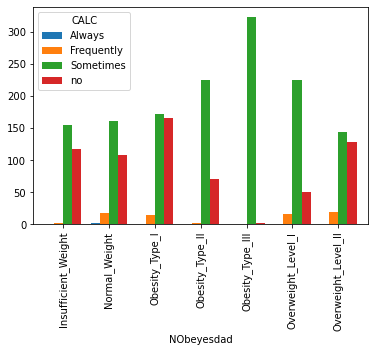

In [23]:
calc_obesity=data.groupby(['NObeyesdad', 'CALC']).size()
calc_obesity.unstack('CALC').plot.bar(width=0.8)

<AxesSubplot:xlabel='NObeyesdad'>

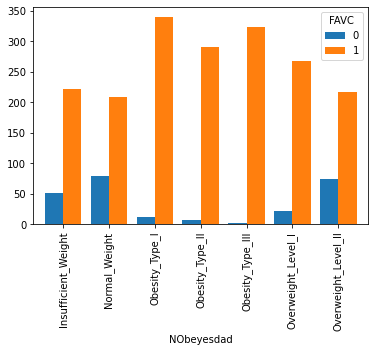

In [24]:
favc_obesity=data.groupby(['NObeyesdad', 'FAVC']).size()
favc_obesity.unstack('FAVC').plot.bar(width=0.8)

<AxesSubplot:xlabel='NObeyesdad'>

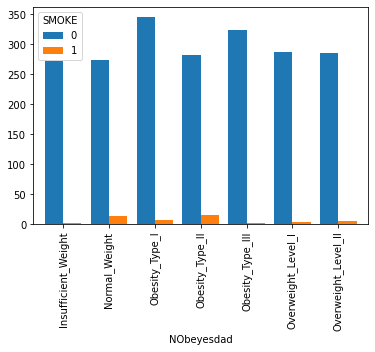

In [35]:
smoking_obesity=data.groupby(['NObeyesdad', 'SMOKE']).size()
smoking_obesity.unstack('SMOKE').plot.bar(width=0.8)

<AxesSubplot:xlabel='NObeyesdad'>

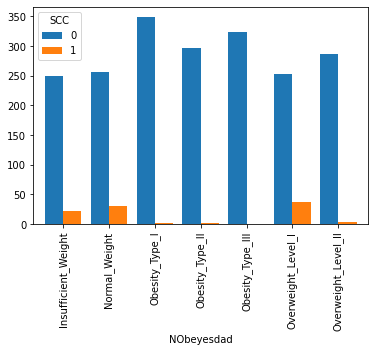

In [36]:
SCC_obesity=data.groupby(['NObeyesdad', 'SCC']).size()
SCC_obesity.unstack('SCC').plot.bar(width=0.8)

<AxesSubplot:xlabel='NObeyesdad'>

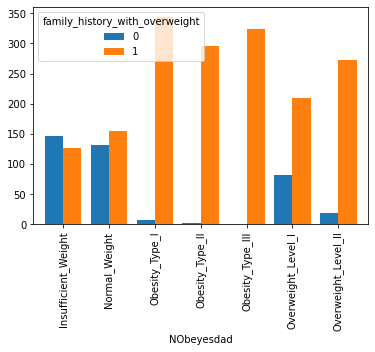

In [10]:


age_obesity=data.groupby(['NObeyesdad', 'family_history_with_overweight']).size()
age_obesity.unstack('family_history_with_overweight').plot.bar(width=0.8)